<a href="https://colab.research.google.com/github/StalkYy-06/5CS037-2024/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Warming Up Exercises

## Problem 1 - Data Read, Write and Inspect

In [3]:
# Load the provided dataset and import in pandas DataFrame.
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd

df=pd.read_csv('/content/gdrive/My Drive/Datasets0/Datasets/bank .csv')

Mounted at /content/gdrive


In [ ]:
# Check info of the DataFrame and identify following:
# (a) columns with dtypes=object

data_obj = df.select_dtypes(include='object')

data_obj

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [ ]:
# (b) unique values of those columns.

for data in data_obj:
   print(df[data].unique())


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [ ]:
# (c) check for the total number of null values in each column.

df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [4]:
# Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in”.csv” with name ”banknumericdata.csv”

df_numeric = df.select_dtypes(exclude='object')

df_numeric.to_csv('/content/gdrive/My Drive/Datasets0/Datasets/banknumericdata.csv')

In [ ]:
# Read ”banknumericdata.csv” and Find the summary statistics.

df_numeric = pd.read_csv('/content/gdrive/My Drive/Datasets0/Datasets/banknumericdata.csv')

df_numeric.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Problem 2 : Data Imputations:

In [5]:
# Load the provided dataset and import in pandas DataFrame.
import pandas as pd

df=pd.read_csv('/content/gdrive/My Drive/Datasets0/Datasets/medical_students_dataset.csv')

In [ ]:
# Check info of the DataFrame and identify column with missing (null) values.

df.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [6]:
# For the column with missing values fill the values using various techniques we discussed above. Try
# to explain why did you select the particular methods for particular column.

#Fill student ID with value 1 greater than previous
df['Student ID']=df['Student ID'].fillna(df['Student ID'].max()+1)

df['Age']=df['Age'].fillna(df['Age'].mean())
#fill the value wirh mean where the age is of null values

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
#We used mode here to assign the missing values with most frequent gender and because the data type is categorical

#Filling numerical values like temperature with average and categorical data with mode
df['Height']=df['Height'].fillna(df['Height'].mean())
df['Weight']=df['Weight'].fillna(df['Weight'].mean())
df['Blood Type']=df['Blood Type'].fillna(df['Blood Type'].mode()[0])
df['Smoking']=df['Smoking'].fillna(df['Smoking'].mode()[0])
df['Diabetes']=df['Diabetes'].fillna(df['Diabetes'].mode()[0])
df['Cholesterol']=df['Cholesterol'].fillna(df['Cholesterol'].mean())
df['Blood Pressure']=df['Blood Pressure'].fillna(df['Blood Pressure'].mean())
df['Heart Rate']=df['Heart Rate'].fillna(df['Heart Rate'].mean())
df['Temperature']=df['Temperature'].fillna(df['Temperature'].mean())

#For BMI, using the formula: Weight in KGS/height in metres^2, Converting height to metres from centimeters
df['BMI']=df['BMI'].fillna(df['Weight']/(df['Height']/100)**2)

df.isnull().sum()

,0
Student ID,0
Age,0
Gender,0
Height,0
Weight,0
Blood Type,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0


In [ ]:
# Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.

df.duplicated().sum()

df.drop_duplicates()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


# Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

**Problem -1**

In [ ]:
import pandas as pd

df=pd.read_csv('/content/gdrive/My Drive/Datasets0/Datasets/Titanic-Dataset.csv')

In [ ]:
# Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
#Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
#median, maximum value, and minimum value of the ’Fare’ column?

subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

firstclass = subset[subset['Pclass'] == 1]

print("Mean of the fare coloumn is ",+firstclass['Fare'].mean())
print("Median of the fare coloumn is ",+firstclass['Fare'].median())
print("Mainimum value of the fare coloumn is ",+firstclass['Fare'].min())
print("Maximum of the fare coloumn is ",+firstclass['Fare'].max())


Mean of the fare coloumn is  84.1546875
Median of the fare coloumn is  60.287499999999994
Mainimum value of the fare coloumn is  0.0
Maximum of the fare coloumn is  512.3292


**Problem - 2 :**

In [ ]:
# How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.

subset['Age'].isnull().sum()

subset.dropna(subset=['Age'])


,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0
...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",3,female,39.0,29.1250,0
886,"Montvila, Rev. Juozas",2,male,27.0,13.0000,0
887,"Graham, Miss. Margaret Edith",1,female,19.0,30.0000,1
889,"Behr, Mr. Karl Howell",1,male,26.0,30.0000,1


**Problem-3 :**

In [ ]:
# The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:

#• ’C’ for Cherbourg
#• ’Q’ for Queenstown
#• ’S’ for Southampton

# Task :
   # 1.Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,’Embarked Q’, ’Embarked S’).
if 'Embarked' in df.columns:
    encoded_df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
# Task 2 :
# Add these new columns to the original DataFrame.

    df = pd.concat([df, encoded_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']]], axis=1)
# Task 3 :
# Drop the original ’Embarked’ column.

    df.drop('Embarked', axis=1, inplace=True)

else :
    print("Embarked column not found in the DataFrame.")

# Task 4:
# Print the first few rows of the modified DataFrame to verify the changes.

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


**Problem-4 :**


<Axes: title={'center': 'Mean Survival Rate by Gender'}, xlabel='Sex', ylabel='Mean Survival Rate'>

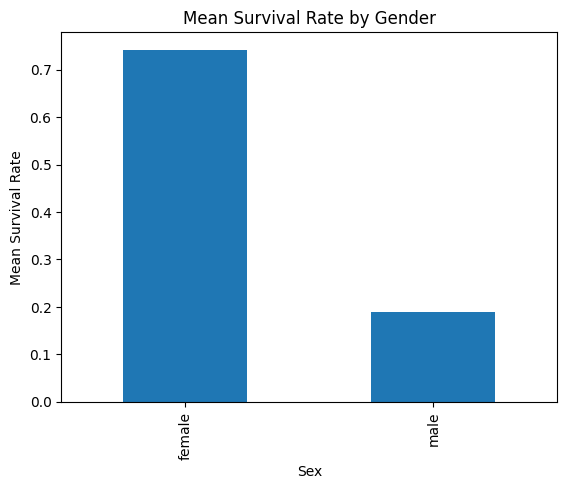

In [ ]:
# Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.

mean_sr = df.groupby('Sex')['Survived'].mean()

mean_sr.plot(kind='bar', xlabel='Sex', ylabel='Mean Survival Rate', title='Mean Survival Rate by Gender')

**Problem-5 :**

<Axes: title={'center': 'Mean Survival Rate by Embarked Port'}, xlabel='Embarked', ylabel='Mean Survival Rate'>

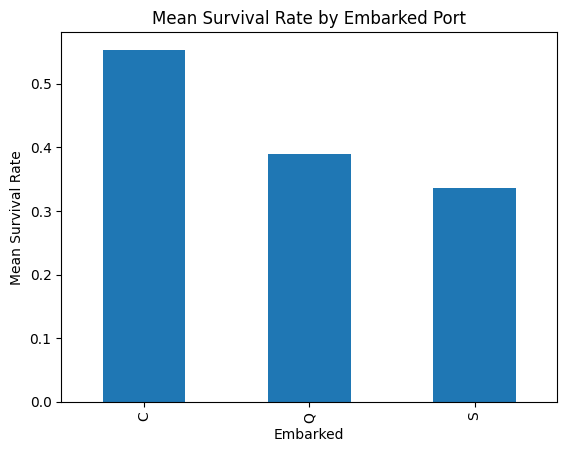

In [ ]:
# Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instanc, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

mean_sr_embarked = df.groupby('Embarked')['Survived'].mean()

mean_sr_embarked.plot(kind='bar', xlabel='Embarked', ylabel='Mean Survival Rate', title='Mean Survival Rate by Embarked Port')